In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
df = pd.read_csv("mushroom_cleaned.csv")
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [6]:
df[df['class']==0]

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
717,997,2,0,10,2.124354,1722,11,0.943195,0
718,914,2,0,10,1.475779,1418,11,0.888450,0
719,865,2,0,10,2.104459,1971,11,0.943195,0
720,841,6,0,10,2.024880,1384,11,0.888450,0
721,914,6,0,10,0.660086,1453,11,0.888450,0
...,...,...,...,...,...,...,...,...,...
53677,422,3,3,2,0.585337,1943,6,0.027372,0
53678,683,1,3,2,0.346598,1801,6,0.027372,0
53679,615,4,3,2,0.255081,1835,6,0.027372,0
53680,374,1,3,2,0.772350,1849,6,0.027372,0


Text(0.5, 1.0, "Distribution de la variable 'class'")

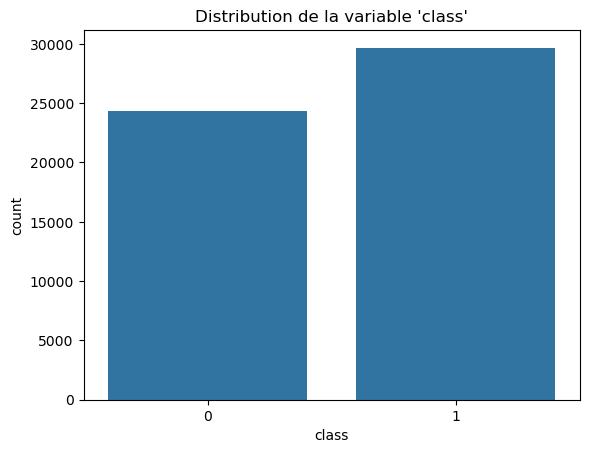

In [7]:
# Diagramme à barre de la variable 'diagnosis'
sns.countplot(x='class', data = df).set_title("Distribution de la variable 'class'")

In [8]:

# Préparation des données
X = df.drop(columns=['class'])
y = df['class']


In [9]:

# Séparation des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Entraînement du modèle Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:

# Prédiction sur l'ensemble de test
y_pred = rf_classifier.predict(X_test)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

In [12]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(report)

Accuracy: 0.9907
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7349
           1       0.99      0.99      0.99      8862

    accuracy                           0.99     16211
   macro avg       0.99      0.99      0.99     16211
weighted avg       0.99      0.99      0.99     16211



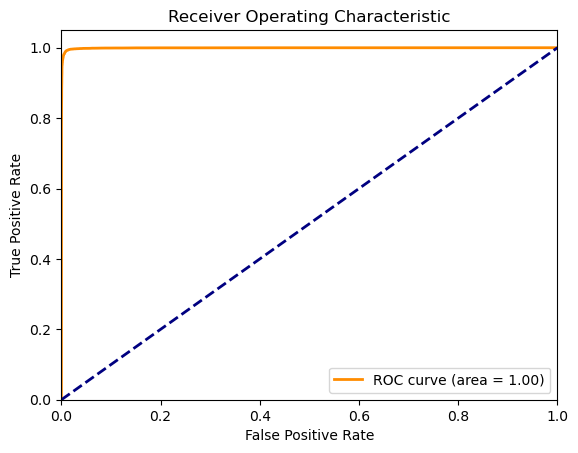

In [13]:

# Calcul de la courbe ROC et de l'AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [14]:

# Extraire un arbre individuel
estimator = rf_classifier.estimators_[0]

In [15]:
#overfiting problem, 

In [16]:
estimator

DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)

In [17]:
import joblib

In [18]:
# Sauvegarder le modèle
joblib.dump(rf_classifier, 'random_forest_model.pkl')
print("Modèle sauvegardé sous 'random_forest_model.pkl'")

Modèle sauvegardé sous 'random_forest_model.pkl'


In [19]:
from flask import Flask, request, jsonify

In [ ]:
# cap-diameter	cap-shape	gill-attachment	gill-color	stem-height	stem-width	stem-color	season

In [24]:
import pickle


app = Flask(__name__)

# Charger le modèle picklé
model = pickle.load(open('random_forest_model.pkl', 'rb'))

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = [data['cap-diameter'], data['cap-shape'], data['gill-attachment'], data['gill-color'], data['stem-height'], data['stem-width'], data['stem-color'],data['season']]
    prediction = model.predict([features])[0]
    return jsonify({'prediction': prediction})

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

c:\Users\Affognon\.conda\envs\augustin\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
